# MALIS 19.3 WPM_T9.2
# Datenanalyse der offenen Daten der Seattle Public Library (Checkouts)
Mit fünf verschiedenen Fragen werden die Checkout-Daten analysiert und die Lösungen implementiert. Hierfür werden die Checkout-Daten der Public Library des Jahres 2019 importiert. Die Datenmenge wird auf 10.000 Zeilen begrenzt.

### Erster Schritt: Packages importieren
Vor dem Download der Checkout-Daten werden zwei hilfeiche Packages importiert: urllib.request und pandas.

In [39]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

### Zweiter Schritt: Checkout-Daten downloaden

In [2]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=10000"
spl_file = "checkouts.csv"

In [3]:
# Überprüfen
spl_file

'checkouts.csv'

In [4]:
# Überprüfen
url

'https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=10000'

In [5]:
urllib.request.urlretrieve(url, spl_file)

('checkouts.csv', <http.client.HTTPMessage at 0x7f23cfdb6050>)

In [6]:
# Neue Variable erstellen:
ausleihen = pd.read_csv(spl_file)

In [7]:
ausleihen

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,AUDIOBOOK,2019,12,2,The Teenage Brain (Enchanced): A Neuroscientis...,Frances E. Jensen,"Nonfiction, Psychology",HarperCollins Publishers Inc.,2015
1,Physical,Horizon,BOOK,2019,12,3,Richard Scarry's Smokey the fireman.,"Scarry, Richard","Fire fighters Juvenile fiction, Animals Juveni...","Random House,",2015.
2,Physical,Horizon,BOOK,2019,12,1,Vernon Subutex : roman. Tome 1 / Virginie Desp...,"Despentes, Virginie, 1969-","Music stores France Paris Fiction, Businessmen...",Grasset : Les Éditions Graset & Fasquelle : Li...,janvier 2018.
3,Physical,Horizon,BOOK,2019,12,1,The lost Gospel of Mary : the Mother of Jesus ...,NaN,Mary Blessed Virgin Saint,"Paraclete Press,",[2007]
4,Digital,OverDrive,EBOOK,2019,12,2,"Be Mine Forever: Bennetts Series, Book 3",Kennedy Ryan,"Fiction, Literature, Romance","Hachette Digital, Inc.",2015
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2019,12,2,A history of the gypsies of Eastern Europe and...,"Crowe, David","Romanies Russia Federation History, Romanies R...","Palgrave Macmilan/St. Martin's Griffin,",2007.
9996,Digital,OverDrive,EBOOK,2019,12,1,"The Apostle: Scot Harvath Series, Book 8",Brad Thor,"Fiction, Thriller","Simon & Schuster, Inc.",2014
9997,Physical,Horizon,BOOK,2019,12,1,Bats in the band / written and illustrated by ...,"Lies, Brian","Bats Juvenile fiction, Music Juvenile fiction,...","Houghton Mifflin Harcourt,",[2014]
9998,Physical,Horizon,BOOK,2019,12,1,Silver girl : a novel / Elin Hilderbrand.,"Hilderbrand, Elin","Female friendship Fiction, Women Massachusetts...","Little, Brown and Co.,",2011.


### Überraschung: ich hatte die Ausleihdaten aller 12 Monate erwartet!
Grund: Es liegt vermutlich an der Begrenzung der Zeilen auf 10.000. Es ergeben sich aber direkt Fragen zu den Ausleihdaten von Dezember 2019. Zu beachten ist jedoch im Folgenden, dass der Dezember durchaus mehr Datensätze als 10.000 enthalten kann, die Ergebnisse aber vermutlich repräsentativ für den Monat sind.

## 1. Frage: Welches Medium wurde im Dezember 2019 am häufigsten ausgeliehen?

In [28]:
# Bevor ich beginne: welche Datentypen enthält der Datensatz?
ausleihen.dtypes

usageclass         object
checkouttype       object
materialtype       object
checkoutyear        int64
checkoutmonth       int64
checkouts           int64
title              object
creator            object
subjects           object
publisher          object
publicationyear    object
dtype: object

In [29]:
# Wie lautet die Zahl der höchsten Ausleihe? Spalte: checkouts, Datentyp: integer
ausleihen.checkouts.max()

560

In [11]:
# Nun wird es spannend: Welches Medium hatte 560 Ausleihen? Gesucht wird die Zeile:
checkmax = ausleihen.checkouts.max()

In [12]:
# Zum Überprüfen:
checkmax

560

In [13]:
# Anzeigen der Zeile und somit des Mediums mit der höchsten Anzahl an Ausleihen
ausleihen[ausleihen.checkouts >= checkmax]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
7536,Physical,Horizon,BOOK,2019,12,560,The testaments / Margaret Atwood.,"Atwood, Margaret, 1939-","Surrogate mothers Fiction, Man woman relations...","Nan A. Talese/Doubleday,",[2019]


### Antwort auf die 1. Frage: Das analoge Buch "The testaments" von Margaret Atwood wurde am häufigsten ausgeliehen.

## 2. Frage: Wie hoch ist die durchschnittliche Ausleihe der Public Library im Dezember 2019?
Der im Dezember am häufigsten ausgeliehene Titel hat mit 560 Checkouts eine erstaunlich hohe Zahl. Es stellt sich die Frage, ob alle Medien der Stadtbibliothek in diesem Monat hohe Ausleihen hatten oder ob der Bestseller-Titel von Margaret Atwood ein sog. Ausreißer ist.

In [14]:
# Wie hoch war die durchschnittliche Ausleihe?
ausleihen.checkouts.mean()

3.65

### Antwort auf die 2. Frage: Die Zahl der durchschnittlichen Ausleihe betrug im Dezember 3,652.

In [15]:
# Und wie hoch war denn die geringste Ausleihe?
ausleihen.checkouts.min()

1

In [16]:
# Der Median wird nun wahrscheinlich zeigen, dass der Maximalwert 560 ein absoluter Ausreißer ist:
ausleihen.checkouts.median()

2.0

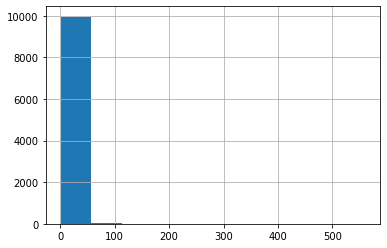

In [30]:
# Anzeigen aller Ausleihzahlen mit einem Historgramm (.hist):
ausleihen["checkouts"].hist()
# Warum zeigt das Histogramm nur einen Balken an??

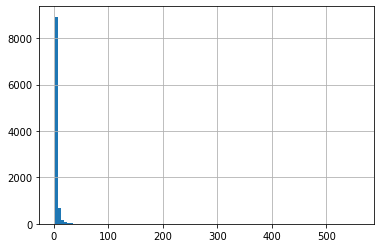

In [18]:
# Mit feinerer Auflösung plotten:
ausleihen["checkouts"].hist(bins=100)
# Doch richtig gemacht! Nun erkenne ich auch die schmale Linie rechts neben dem Balken im 1. Histogramm.

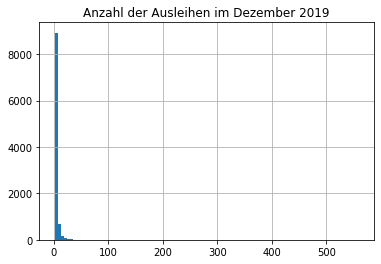

In [46]:
# Jetzt füge ich noch einen Titel zu und möchte nur die Grafik ausgeben:
ausleihen["checkouts"].hist(bins=100)
plt.title('Anzahl der Ausleihen im Dezember 2019')
plt.show()

### Fazit aus Frage 1 + 2:
Die durchschnittlichen Ausleihzahlen von Dezember 2019 entsprechen mit 3 - 4 Ausleihen (Mittelwert) bzw. 2 Ausleihen (Medien) pro Ttiel den üblichen Zahlen einer öffentlichen Bibliothek. Es wäre interessant nachzuforschen, wieso der Buchtitel "The testaments" von Atwood eine so hohe Ausleihzahl hatte oder ob es sich um einen Eingabefehler handelt.

## 3. Frage: Von welchem creator wurden im Dezember 2019 die meisten Medientitel ausgeliehen?
Gesucht wird der beliebteste creator, also der Schöpfer bzw. die Schöpferin von Werken (Bücher, Filme usw.), von dem am meisten Titel ausgeliehen wurden. Es wird nicht nach dem creator mit den meisten Ausleihen gefragt!

In [19]:
# Zunächst lasse ich mir die ersten und die letzten creator anzeigen:
ausleihen.creator.value_counts()

Patterson, James, 1947-    20
James Patterson            17
M. C. Beaton               12
Nora Roberts               12
Agatha Christie            10
                           ..
Benn, James R.              1
Meredith, Leda              1
O'Brien, Dan, 1947-         1
Stibbe, Nina                1
Douglas J. Lisle, Ph.D.     1
Name: creator, Length: 7352, dtype: int64

### Antwort auf die 3. Frage: Das Ergebnis ist eindeutig - James Patterson war mit insgesamt 38 entliehenen Medientiteln der mit Abstand beliebteste creator im Dezember 2019.
Wieso tauchen aber zwei unterschiedliche Schreibweisen des Autors auf? Aus meiner Erfahrung könnte die erste Schreibweise ("Patterson, James, 1947-") auf den Metadaten der analogen Medien und die 2. Schreibweise ("James Patterson") auf den Metadaten der digitalen Medien beruhen.

In [20]:
# Ich lasse mir die ersten und die letzten fünf creators der analogen Medien (Usageclass: 'Physical') anzeigen:
ausleihen[ausleihen.usageclass == 'Physical'].creator.value_counts()

Patterson, James, 1947-                 20
Seuss, Dr.                               8
Warner, Gertrude Chandler, 1890-1979     7
Rylant, Cynthia                          7
Keene, Carolyn                           7
                                        ..
Tey, Josephine, 1896 or 1897-1952        1
Yancey, Richard                          1
Grateful Dead (Musical group)            1
Yellowhorn, Eldon, 1956-                 1
Condie, Allyson Braithwaite              1
Name: creator, Length: 4343, dtype: int64

In [21]:
# Und die ersten und letzten fünf creators der digitalen Medien (Usageclass: 'Digital'):
ausleihen[ausleihen.usageclass == 'Digital'].creator.value_counts()

James Patterson              17
Nora Roberts                 12
M. C. Beaton                 12
Stephen King                 10
Agatha Christie              10
                             ..
Susan J Benjamin              1
Jhené Aiko Efuru Chilombo     1
M. K. England                 1
James Altucher                1
Jeanne Louise Pyle            1
Name: creator, Length: 3010, dtype: int64

### Ergebnis: Meine Vermutung hat sich bestätigt, "James Patterson" sind die 18 digitalen und "Patterson, James, 1947-" die analogen Medien.
Interessant ist: James Patterson ist sowohl analog als auch digital der beliebteste creator im Dezember 2019. Nora Roberts und die drei anderen beliebten creators wurden entweder digital oder analog entliehen.
### Jetzt drängt sich noch folgende Frage auf: Um welche Medientitel handelt es sich bei den 38 Werken von James Pattersons bzw. welche Titel wurden analog und welche digital ausgeliehen?

In [22]:
# Alle Medientitel analog/physical (= "Patterson, James, 1947-"):
ausleihen[ausleihen.creator == 'Patterson, James, 1947-']

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
511,Physical,Horizon,SOUNDDISC,2019,12,1,Private India : city on fire / James Patterson...,"Patterson, James, 1947-","Private investigators India Mumbai Fiction, Se...","Hachette Audio,",[2014]
2485,Physical,Horizon,BOOK,2019,12,17,Killer instinct / James Patterson & Howard Rou...,"Patterson, James, 1947-","College teachers Fiction, Women detectives New...","Little, Brown and Company,",[2019]
2569,Physical,Horizon,BOOK,2019,12,3,Give thank you a try / James Patterson.,"Patterson, James, 1947-","Gratitude Juvenile fiction, Kindness Juvenile ...","Little, Brown and Company,",[2017]
4027,Physical,Horizon,SOUNDDISC,2019,12,1,14th deadly sin / James Patterson [and Maxine ...,"Patterson, James, 1947-",Womens Murder Club Imaginary organization Fict...,"Blackstone Audio, Inc. ; Hachette Audio,",[2015]
5433,Physical,Horizon,BOOK,2019,12,4,Jacky Ha-Ha : my life is a joke / James Patter...,"Patterson, James, 1947-","Summer employment Juvenile fiction, Theater Ju...","Jimmy Patterson Books/Little, Brown and Company,",2017.
5615,Physical,Horizon,REGPRINT,2019,12,18,Unsolved / James Patterson and David Ellis.,"Patterson, James, 1947-",United States Federal Bureau of Investigation ...,"Little, Brown and Company,",2019.
6255,Physical,Horizon,BOOK,2019,12,3,Quest for the city of gold / by James Patterso...,"Patterson, James, 1947-","Treasure troves Juvenile fiction, Family owned...","Jimmy Patterson Books / Little, Brown and Comp...",2018.
6369,Physical,Horizon,BOOK,2019,12,1,"I, Michael Bennett / James Patterson and Micha...","Patterson, James, 1947-","Bennett Michael Fictitious character Fiction, ...","Little, Brown and Co.,",2012.
6442,Physical,Horizon,SOUNDDISC,2019,12,1,Laugh out loud / James Patterson and Chris Gra...,"Patterson, James, 1947-","Books and reading Juvenile fiction, Publishers...","Hachette Book Group,",[2017]
6649,Physical,Horizon,BOOK,2019,12,3,Dog diaries / James Patterson ; with Steven Bu...,"Patterson, James, 1947-","Dogs Juvenile fiction, Diaries Juvenile fictio...","Jimmy Patterson Books, Little, Brown and Company,",2018.


In [23]:
# Alle Medientitel digital (= "James Patterson"):
ausleihen[ausleihen.creator == 'James Patterson']

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
1430,Digital,OverDrive,EBOOK,2019,12,9,The 13-Minute Murder: A Thriller,James Patterson,"Fiction, Suspense, Thriller","Hachette Digital, Inc.",2019
1451,Digital,OverDrive,AUDIOBOOK,2019,12,1,Hunted (Unabridged),James Patterson,"Fiction, Suspense, Thriller","Blackstone Audio, Inc.",2016
1967,Digital,OverDrive,AUDIOBOOK,2019,12,14,"The Cornwalls Are Gone: Amy Cornwall Series, B...",James Patterson,"Fiction, Suspense, Thriller","Blackstone Audio, Inc.",2019
1978,Digital,OverDrive,AUDIOBOOK,2019,12,3,"Chase: Michael Bennett Series, Book 9.5 (unabr...",James Patterson,"Fiction, Mystery, Thriller","Blackstone Audio, Inc.",2016
2527,Digital,OverDrive,EBOOK,2019,12,9,"14th Deadly Sin: Women's Murder Club Series, B...",James Patterson,"Fiction, Mystery, Suspense, Thriller","Hachette Digital, Inc.",2015
3001,Digital,OverDrive,EBOOK,2019,12,8,The Store,James Patterson,"Fiction, Thriller","Hachette Digital, Inc.",2017
3274,Digital,OverDrive,AUDIOBOOK,2019,12,2,"Rebels with a Cause: Max Einstein Series, Book...",James Patterson,"Juvenile Fiction, Juvenile Literature, Science...","Blackstone Audio, Inc.",2019
3925,Digital,OverDrive,EBOOK,2019,12,1,"The Final Warning: Maximum Ride Series, Book 4",James Patterson,"Science Fiction, Thriller, Young Adult Fiction","Hachette Digital, Inc.",2010
4715,Digital,OverDrive,AUDIOBOOK,2019,12,15,"1st to Die: Women's Murder Club Series, Book 1...",James Patterson,"Fiction, Mystery, Thriller",Hachette Audio,2006
6242,Digital,OverDrive,AUDIOBOOK,2019,12,3,"Double Cross: Alex Cross Series, Book 13 (unab...",James Patterson,"Fiction, Mystery",Books on Tape,2008


### Fazit: Digital wurden ausschließlich Bücher ("EBOOK") und Hörbücher ("AUDIOBOOK) von Patterson entliehen. Analog wurden Bücher ("BOOKS"), Hörbücher ("SOUNDDISC") und ein sog. "REGPRINT" ausgeliehen.

## 4. Frage: Wurden im Dezember 2019 mehr digitale oder analoge Bücher und Hörbücher ausgeliehen?
In der Stadtbücherei Münster können die Kunden durch den Bibliotheksverbund muensterload.de immer mehr digitale Medien ausleihen, hier hauptsächlich eBooks und eAudios. Es überwiegen aber immer noch die analogen Bücher und Hörbücher. Wie sah dieses Verhältnis in der Seattle Public Library im Dezember 2019 aus?

In [24]:
# Welche Medientypen ("materialtype") gibt es überhaupt und wie viele jeweils ("value_counts"):
ausleihen.materialtype.value_counts()

BOOK                              4421
EBOOK                             2747
AUDIOBOOK                         1138
VIDEODISC                          885
SOUNDDISC                          737
REGPRINT                            22
MUSIC                               15
SOUNDDISC, VIDEODISC                 9
VIDEO                                9
ER                                   4
LARGEPRINT                           4
ER, SOUNDDISC                        3
MUSICSNDREC                          1
CR                                   1
ATLAS                                1
VISUAL                               1
SOUNDREC                             1
SOUNDCASS, SOUNDDISC, SOUNDREC       1
Name: materialtype, dtype: int64

### Antwort auf die 4. Frage: In der Ausleihe überwiegen mit 4416 Titeln eindeutig die analogen Bücher (BOOKS) gegenüber den 2749 digitalen Büchern (EBOOK). Bei den Hörbüchern ist es andersherum: die digitalen Hörbücher (AUDIOBOOK) sind mit 1133 Titeln wesentlich häufiger vertreten als die analogen Hörbücher (SOUNDDISC) mit 746 Titeln.

In [35]:
# Zur Erinnerung: welcher Datentyp ist materialtype?
ausleihen.dtypes

usageclass         object
checkouttype       object
materialtype       object
checkoutyear        int64
checkoutmonth       int64
checkouts           int64
title              object
creator            object
subjects           object
publisher          object
publicationyear    object
dtype: object

### Zur besseren Veranschaulichung der vier Medientypen: Umsetzung der Verteilung von Books und Ebooks sowie Sounddiscs und Audiobooks in einem Kuchendiagramm

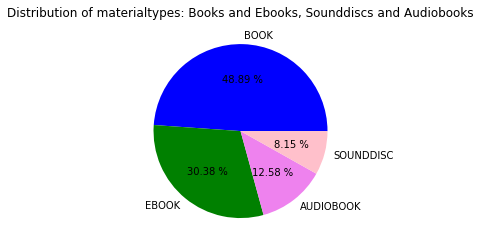

In [43]:
# Alle vier gewünschten Materialtypen als Variablen mit "loc" herausfiltern und mit "count()[0]" zählen:
BOOK = ausleihen.loc[ausleihen['materialtype'] == 'BOOK'].count()[0]
EBOOK = ausleihen.loc[ausleihen['materialtype'] == 'EBOOK'].count()[0]
AUDIOBOOK = ausleihen.loc[ausleihen['materialtype'] == 'AUDIOBOOK'].count()[0]
SOUNDDISC = ausleihen.loc[ausleihen['materialtype'] == 'SOUNDDISC'].count()[0]

# Beschriftung ("labels") und Farben ("colors") festlegen:
labels = ['BOOK', 'EBOOK', 'AUDIOBOOK', 'SOUNDDISC']
colors = ['blue', 'green', 'violet', 'pink']

# Mit "plt.pie" festlegen, welche Materialtypen ich plotten will, Prozentangabe hinzufügen und Diagramm betiteln:
plt.pie([BOOK, EBOOK, AUDIOBOOK, SOUNDDISC], labels = labels, colors=colors, autopct='%.2f %%')
plt.title('Distribution of materialtypes: Books and Ebooks, Sounddiscs and Audiobooks')
plt.show()

### Fazit 4. Frage: Das Kuchendiagramm zeigt anschaulich, dass in der Seattle Public Library im Dezember 2019  die analogen Bücher mit fast 50 % eindeutig überwiegen. Der Anteil der digitalen Bücher ist jedoch mit gut 30 % tatsächlich ebenfalls sehr hoch. Mit größerem Abstand folgen dann erst die digitalen Hörbücher (knapp 13 %) und die analogen Hörbücher (rund 8 %).